In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the data 
train_dir=r'archive (4)/Train_Test_Valid/Train'
test_dir=r'archive (4)/Train_Test_Valid/test'


In [3]:
print(f"Number of jellyfish images in training set:{len(os.listdir(os.path.join(train_dir,'barrel_jellyfish')))}")
print(f"Number of jellyfish images in training set:{len(os.listdir(os.path.join(train_dir,'blue_jellyfish')))}")
print(f"Number of jellyfish images in training set:{len(os.listdir(os.path.join(train_dir,'compass_jellyfish')))}")
print(f"Number of jellyfish images in training set:{len(os.listdir(os.path.join(train_dir,'lions_mane_jellyfish')))}")
print(f"Number of jellyfish images in training set:{len(os.listdir(os.path.join(train_dir,'mauve_stinger_jellyfish')))}")
print(f"Number of jellyfish images in training set:{len(os.listdir(os.path.join(train_dir,'Moon_jellyfish')))}")

print(f"Number of jellyfish images in test set:{len(os.listdir(os.path.join(test_dir,'barrel_jellyfish')))}")
print(f"Number of jellyfish images in test set:{len(os.listdir(os.path.join(test_dir,'blue_jellyfish')))}")
print(f"Number of jellyfish images in test set:{len(os.listdir(os.path.join(test_dir,'compass_jellyfish')))}")
print(f"Number of jellyfish images in test set:{len(os.listdir(os.path.join(test_dir,'lions_mane_jellyfish')))}")
print(f"Number of jellyfish images in test set:{len(os.listdir(os.path.join(test_dir,'mauve_stinger_jellyfish')))}")
print(f"Number of jellyfish images in test set:{len(os.listdir(os.path.join(test_dir,'Moon_jellyfish')))}")

Number of jellyfish images in training set:150
Number of jellyfish images in training set:150
Number of jellyfish images in training set:150
Number of jellyfish images in training set:150
Number of jellyfish images in training set:150
Number of jellyfish images in training set:150
Number of jellyfish images in test set:5
Number of jellyfish images in test set:7
Number of jellyfish images in test set:7
Number of jellyfish images in test set:8
Number of jellyfish images in test set:7
Number of jellyfish images in test set:6


 barrel jellyfish Images:


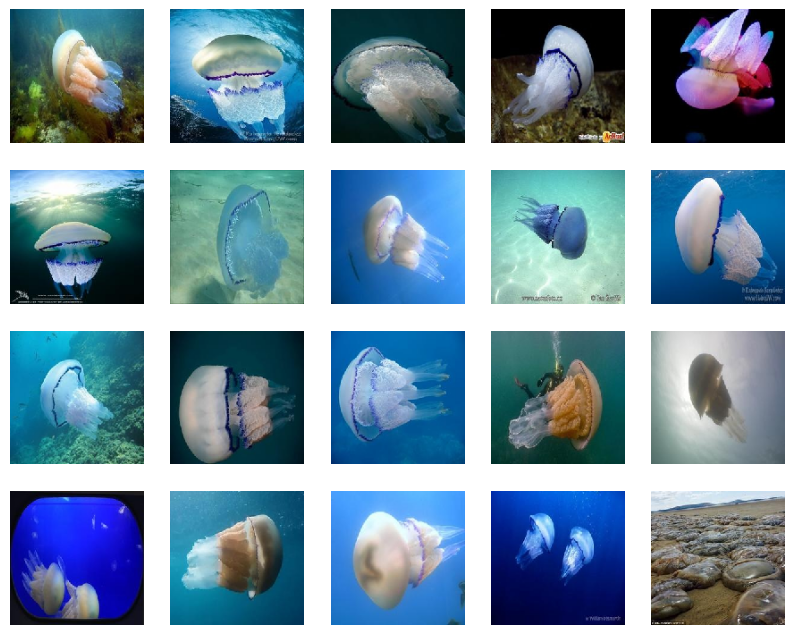

 blue jellyfish Images:


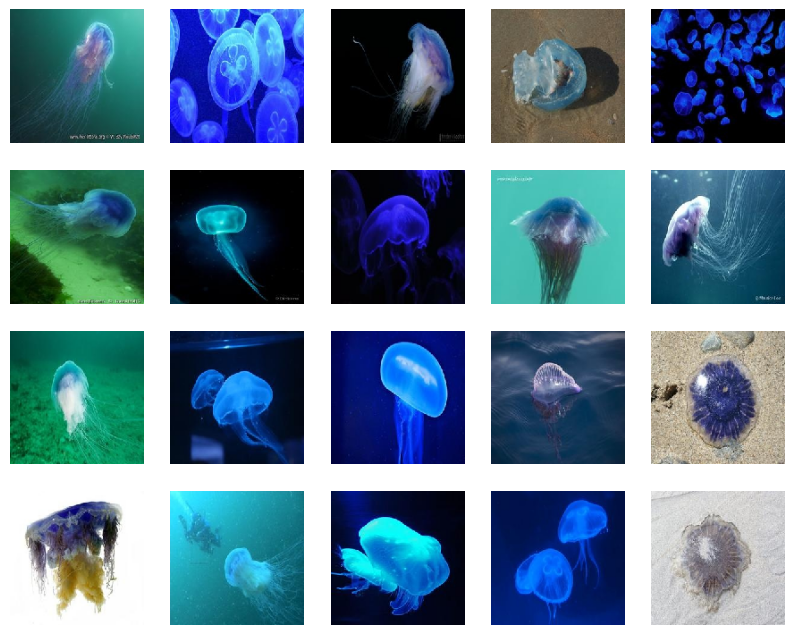

 compass jellyfish Images:


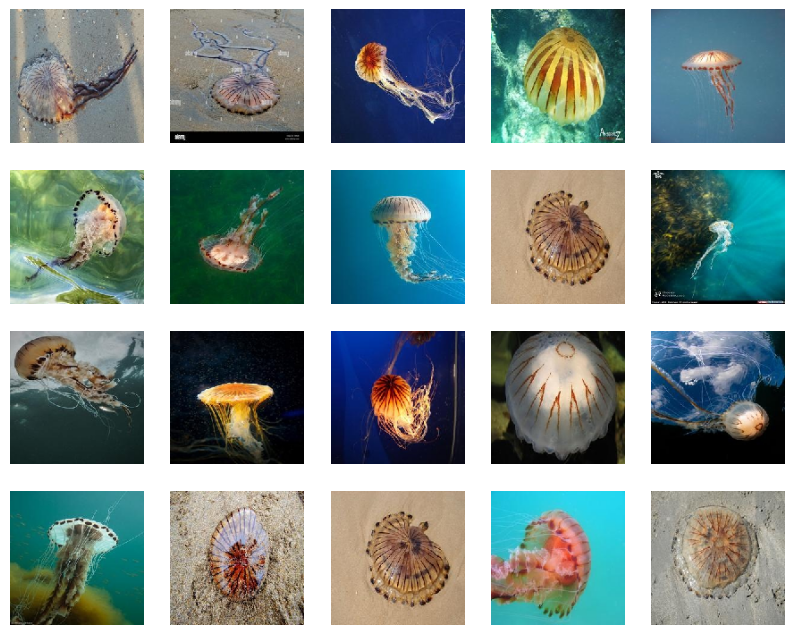

 lions mane jellyfish Images:


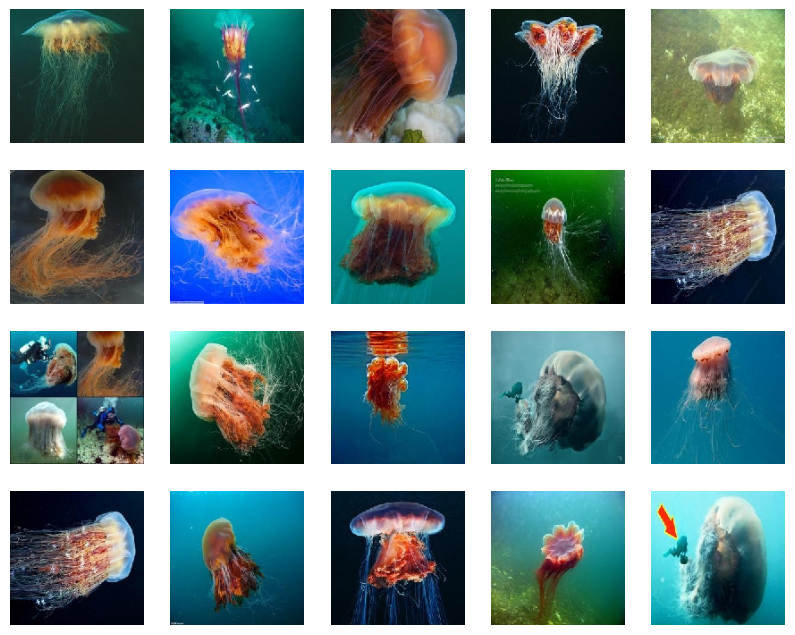

 mauve stinger jellyfish Images:


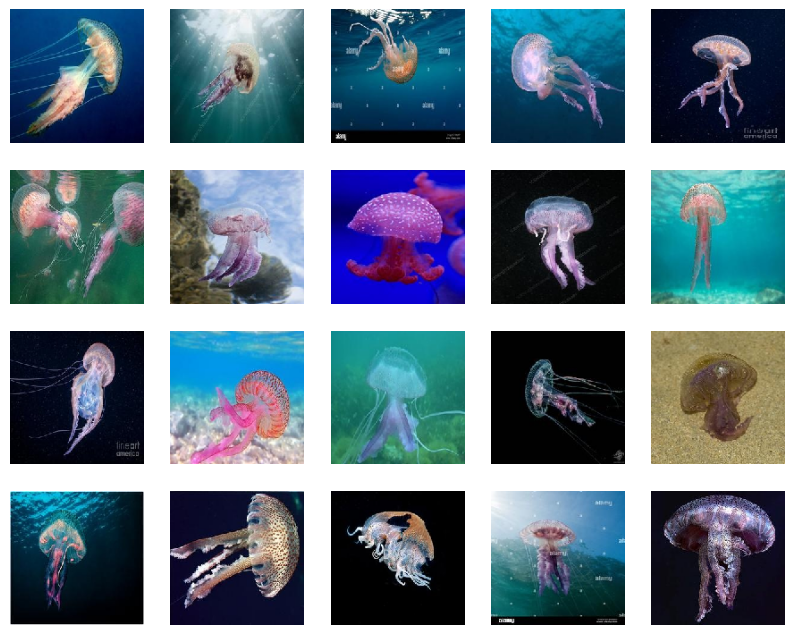

 moon jellyfish Images:


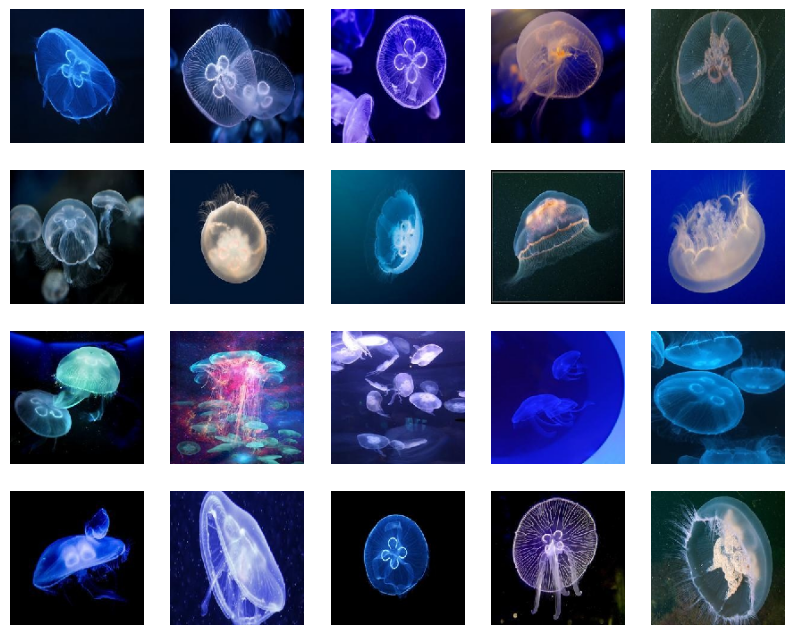

In [4]:
# display the sample images
def display_images(class_name,num_images):
    class_dir=os.path.join(train_dir,class_name)
    images=os.listdir(class_dir)
    plt.figure(figsize=(10,8))
    for i in range(num_images):
        plt.subplot(4,5,i+1)
        img=load_img(os.path.join(class_dir,images[i]),target_size=(150,150))
        plt.imshow(img)
        plt.axis('off')
    plt.show()

print(" barrel jellyfish Images:")
display_images('barrel_jellyfish',20)
print(" blue jellyfish Images:")
display_images('blue_jellyfish',20)
print(" compass jellyfish Images:")
display_images('compass_jellyfish',20)
print(" lions mane jellyfish Images:")
display_images('lions_mane_jellyfish',20)
print(" mauve stinger jellyfish Images:")
display_images('mauve_stinger_jellyfish',20)
print(" moon jellyfish Images:")
display_images('Moon_jellyfish',20)



In [5]:
#image data generator with data augmentation

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen=ImageDataGenerator(rescale=1./255)

#generate training data
train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)
test2_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 900 images belonging to 6 classes.
Found 40 images belonging to 6 classes.


In [6]:
#biuld the cnn model
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(6,activation='softmax')

])

#compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
 

In [7]:
#train the model
history=model.fit(
    train_generator ,
    epochs=60,
    validation_data= train_generator
)

Epoch 1/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 17s 490ms/step - accuracy: 0.2005 - loss: 1.7795 - val_accuracy: 0.2989 - val_loss: 1.6009
Epoch 2/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 461ms/step - accuracy: 0.3352 - loss: 1.5448 - val_accuracy: 0.3711 - val_loss: 1.4315
Epoch 3/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 451ms/step - accuracy: 0.3790 - loss: 1.3918 - val_accuracy: 0.4500 - val_loss: 1.3549
Epoch 4/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 461ms/step - accuracy: 0.4162 - loss: 1.3872 - val_accuracy: 0.4744 - val_loss: 1.2798
Epoch 5/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 447ms/step - accuracy: 0.4721 - loss: 1.3149 - val_accuracy: 0.4844 - val_loss: 1.2842
Epoch 6/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 450ms/step - accuracy: 0.4925 - loss: 1.2846 - val_accuracy: 0.5211 - val_loss: 1.1883
Epoch 7/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 456ms/step - accuracy: 0.5495 - loss: 1.1338 - val_accuracy: 0.5456 - val_loss: 1.1731
Epoch 8/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 451ms/step - accuracy: 0.5820 - loss: 1.1116 - val_accu

In [8]:
#evaluate the model
loss,accuracy=model.evaluate(train_generator)
print(f'validation Accuracy:{accuracy*100:.2f}%')

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.9752 - loss: 0.0823
validation Accuracy:96.89%


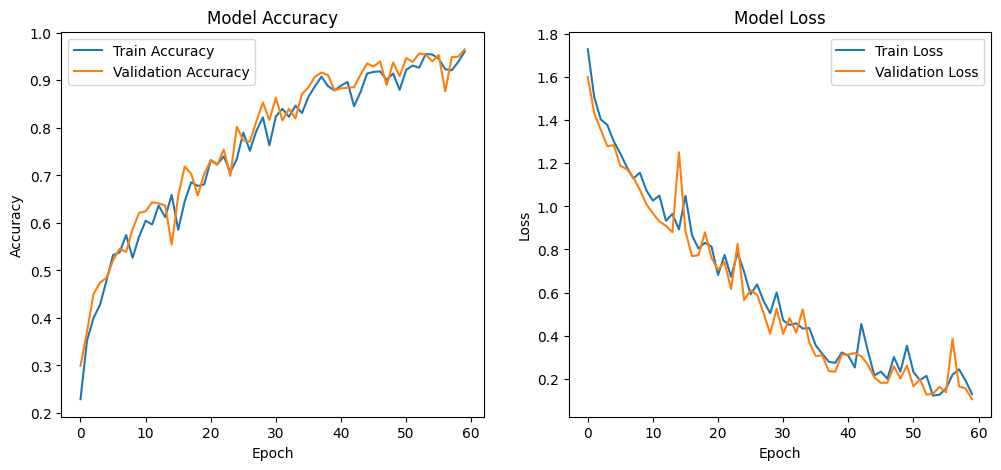

In [11]:
# plot accuracy and loss graphs 
plt.figure(figsize=(12,5))

#plot training and validation accuracy values 
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()